# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [54]:
# Cargar todas las librerías
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

## Cargar datos

In [55]:
# Carga los archivos de datos en diferentes DataFrames

## Preparar los datos

## Tarifas

In [98]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [56]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Usuarios

In [99]:
# Imprime la información general/resumida sobre el DataFrame de los usuarios
df_users.info()
df_users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

In [100]:
# Imprime una muestra de los datos para los usuarios 
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Llamadas

In [101]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()
df_calls.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 4.7+ MB


0

In [60]:
# Imprime una muestra de los datos para las llamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


## Mensajes

In [103]:
# Imprime la información general/resumida sobre el DataFrame de los mesanjes
df_messages.info()
df_messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


0

In [62]:
# Imprime una muestra de los datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


## Internet

In [104]:
# Imprime la información general/resumida sobre el DataFrame del internet
df_internet.info()
df_internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB


0

In [64]:
# Imprime una muestra de los datos para el internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


En general, la composición de los datos es buena. Al analizar la información de los datasets, observamos que todos, excepto la columna 'churn_date' en el conjunto de datos de usuarios, están completos sin valores ausentes. En cuanto a la columna 'churn_date', la ausencia de datos parece tener una razón válida ya que representa usuarios con planes activos por lo cual no sera necesario hacer un preprocesamiento ya que no nos afecta en tareas posterores. Además, ninguno de nuestros datasets presenta valores duplicados, por lo que no es necesario realizar ningún preprocesamiento en esta área de igual manera. Por último, los datasets de llamadas, mensajes e internet contienen fechas representadas como cadenas de texto, las cuales serán convertidas al tipo de dato datetime para facilitar su manipulación. Este será el único procesamiento necesario en los datos.

## Corregir datos

In [66]:
# Cambiamos las columnas correspodiente a fechas a tipo de dato datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')


## Estudiar las condiciones de las tarifas

In [67]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [68]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Extraemos unicamente el mes de la fecha y lo guardamos en una nueva columna
df_calls['month'] = df_calls['call_date'].dt.month
# Agrupamos por mes y por numero de usuario y contamos el nuemero de llamadas por mes por usuario
calls_per_user_per_month = df_calls.groupby(['user_id', 'month']).agg(calls_count=('id', 'count')).reset_index()
print(calls_per_user_per_month)

      user_id  month  calls_count
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [69]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Agrupamos por mes y por numero de usuario y sumamos la duracion de llamadas por mes por usuario
mins_per_user_per_month = df_calls.groupby(['user_id', 'month']).agg(total_minutes=('duration', 'sum')).reset_index()
print(mins_per_user_per_month)

      user_id  month  total_minutes
0        1000     12         116.83
1        1001      8         171.14
2        1001      9         297.69
3        1001     10         374.11
4        1001     11         404.59
...       ...    ...            ...
2253     1498     12         324.77
2254     1499      9         330.37
2255     1499     10         363.28
2256     1499     11         288.56
2257     1499     12         468.10

[2258 rows x 3 columns]


In [105]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Extraemos unicamente el mes de la fecha y lo guardamos en una nueva columna
df_messages['month'] = df_messages['message_date'].dt.month
# Agrupamos por mes y por numero de usuario y contamos el nuemero de mensajes por mes por usuario
messages_per_user_per_month = df_messages.groupby(['user_id', 'month']).agg(messages_count=('id', 'count')).reset_index()
print(messages_per_user_per_month)

      user_id  month  messages_count
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1801     1496      9              21
1802     1496     10              18
1803     1496     11              13
1804     1496     12              11
1805     1497     12              50

[1806 rows x 3 columns]


In [71]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Extraemos unicamente el mes de la fecha y lo guardamos en una nueva columna
df_internet['month'] = df_internet['session_date'].dt.month
# Agrupamos por mes y por numero de usuario y sumamos el traficos de datos por mes por usuario
internet_per_user_per_month = df_internet.groupby(['user_id', 'month']).agg(total_mb_used=('mb_used', 'sum')).reset_index()
print(internet_per_user_per_month)

      user_id  month  total_mb_used
0        1000     12        1901.47
1        1001      8        6919.15
2        1001      9       13314.82
3        1001     10       22330.49
4        1001     11       18504.30
...       ...    ...            ...
2272     1498     12       23137.69
2273     1499      9       12984.76
2274     1499     10       19492.43
2275     1499     11       16813.83
2276     1499     12       22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [72]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_data = calls_per_user_per_month.merge(mins_per_user_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(messages_per_user_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(internet_per_user_per_month, on=['user_id', 'month'], how='outer')

merged_data.head(15)

,user_id,month,calls_count,total_minutes,messages_count,total_mb_used
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
5,1001,12,56.0,392.93,44.0,19369.18
6,1002,10,11.0,54.13,15.0,6552.01
7,1002,11,55.0,359.76,32.0,19345.08
8,1002,12,47.0,363.24,41.0,14396.24
9,1003,12,149.0,1041.00,50.0,27044.14


In [73]:
# Añade la información del conjunto de datos users
df_merged = pd.merge(merged_data, df_users, on=['user_id'], how='left')
# Eliminamos las columnas que no son necesarias
df_merged.drop(['first_name', 'last_name', 'age', 'reg_date', 'churn_date'], axis=1, inplace=True)
df_merged.head(15)

,user_id,month,calls_count,total_minutes,messages_count,total_mb_used,city,plan
0,1000,12,16.0,116.83,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,27.0,171.14,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49.0,297.69,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,65.0,374.11,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,64.0,404.59,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf
5,1001,12,56.0,392.93,44.0,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf
6,1002,10,11.0,54.13,15.0,6552.01,"Las Vegas-Henderson-Paradise, NV MSA",surf
7,1002,11,55.0,359.76,32.0,19345.08,"Las Vegas-Henderson-Paradise, NV MSA",surf
8,1002,12,47.0,363.24,41.0,14396.24,"Las Vegas-Henderson-Paradise, NV MSA",surf
9,1003,12,149.0,1041.00,50.0,27044.14,"Tulsa, OK MSA",surf


## Ingresos mesuales por usuario

In [95]:
# Calcula el ingreso mensual para cada usuario
def calculate_monthly_income(row):
    plan = row['plan']
    total_minutes = row['total_minutes']
    messages_count = row['messages_count']
    total_mb_used = row['total_mb_used']

    if plan == 'surf':
        base_cost = 20
        base_minutes = 500
        base_messages = 50
        base_data_gb = 15
        extra_minute_cost = 0.03
        extra_message_cost = 0.03
        extra_gb_cost = 10
    elif plan == 'ultimate':
        base_cost = 70
        base_minutes = 3000
        base_messages = 1000
        base_data_gb = 30
        extra_minute_cost = 0.01
        extra_message_cost = 0.01
        extra_gb_cost = 7
    else:
        raise ValueError("Invalid plan specified.")

    # Calculate excesses
    if total_minutes > base_minutes:
        extra_minutes = math.ceil(total_minutes - base_minutes)
    else:
        extra_minutes = 0

    if messages_count > base_messages:
        extra_messages = messages_count - base_messages
    else:
        extra_messages = 0

    if total_mb_used > base_data_gb * 1024:
        extra_gb = math.ceil((total_mb_used - base_data_gb * 1024) / 1024)
    else:
        extra_gb = 0

    # Calculate additional charges
    additional_charges = (extra_minutes * extra_minute_cost +
                          extra_messages * extra_message_cost +
                          extra_gb * extra_gb_cost)

    # Calculate total income for the month
    total_income = base_cost + additional_charges

    return total_income

# Aplicar la función a cada fila del DataFrame y agregar como nueva columna
df_merged['monthly_income'] = df_merged.apply(calculate_monthly_income, axis=1)
df_merged.head(15)


,user_id,month,calls_count,total_minutes,messages_count,total_mb_used,city,plan,monthly_income
0,1000,12,16.0,116.83,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,27.0,171.14,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,49.0,297.69,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,65.0,374.11,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,64.0,404.59,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
5,1001,12,56.0,392.93,44.0,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
6,1002,10,11.0,54.13,15.0,6552.01,"Las Vegas-Henderson-Paradise, NV MSA",surf,20.00
7,1002,11,55.0,359.76,32.0,19345.08,"Las Vegas-Henderson-Paradise, NV MSA",surf,60.00
8,1002,12,47.0,363.24,41.0,14396.24,"Las Vegas-Henderson-Paradise, NV MSA",surf,20.00
9,1003,12,149.0,1041.00,50.0,27044.14,"Tulsa, OK MSA",surf,156.23


## Estudia el comportamiento de usuario

### Llamadas

        plan  month  total_minutes
0       surf      1     192.840000
1       surf      2     280.851111
2       surf      3     310.970000
3       surf      4     332.380000
4       surf      5     387.108000
5       surf      6     411.450625
6       surf      7     428.060917
7       surf      8     394.474717
8       surf      9     397.133298
9       surf     10     414.435733
10      surf     11     408.255415
11      surf     12     457.547074
12  ultimate      1     183.162500
13  ultimate      2     443.171667
14  ultimate      3     285.701667
15  ultimate      4     316.508095
16  ultimate      5     383.664828
17  ultimate      6     365.358222
18  ultimate      7     403.767288
19  ultimate      8     397.274789
20  ultimate      9     413.287326
21  ultimate     10     429.217238
22  ultimate     11     423.814683
23  ultimate     12     438.824832


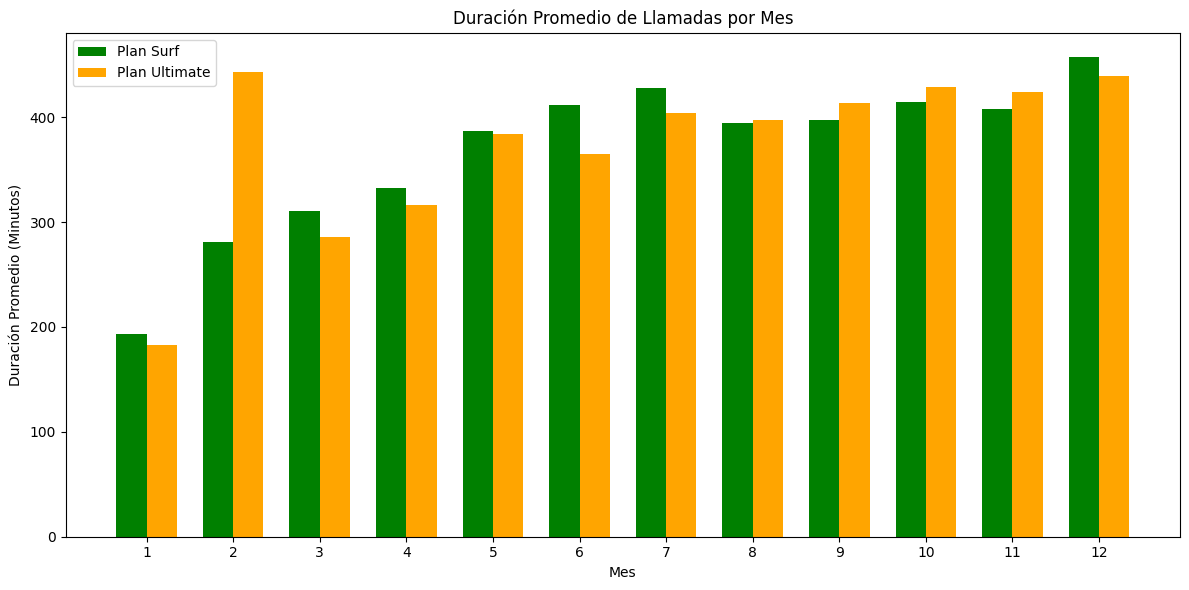

In [75]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_duration = df_merged.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()
print(avg_duration)

avg_duration_surf = avg_duration[avg_duration['plan'] == 'surf']
avg_duration_ultimate = avg_duration[avg_duration['plan'] == 'ultimate']

# Obtener los meses únicos para ajustar la posición de las barras
months = avg_duration['month'].unique()
num_months = len(months)

# Crear la figura y los ejes para los gráficos
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular el ancho de las barras
bar_width = 0.35

# Definir la posición de las barras para surf y ultimate
surf_positions = np.arange(num_months)
ultimate_positions = np.arange(num_months) + bar_width

# Graficar para el plan 'surf'
ax.bar(surf_positions, avg_duration_surf['total_minutes'], width=bar_width, color='green', label='Plan Surf')

# Graficar para el plan 'ultimate'
ax.bar(ultimate_positions, avg_duration_ultimate['total_minutes'], width=bar_width, color='orange', label='Plan Ultimate')

# Configuración adicional del gráfico
ax.set_title('Duración Promedio de Llamadas por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Duración Promedio (Minutos)')
ax.set_xticks(np.arange(num_months) + bar_width / 2)
ax.set_xticklabels(months)
ax.legend()

# Ajustar el espaciado entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

        plan  month  total_minutes
0       surf      1         385.68
1       surf      2        2527.66
2       surf      3        7152.31
3       surf      4       16619.00
4       surf      5       29033.10
5       surf      6       39499.26
6       surf      7       51367.31
7       surf      8       62721.48
8       surf      9       75852.46
9       surf     10       96149.09
10      surf     11      113086.75
11      surf     12      142297.14
12  ultimate      1         732.65
13  ultimate      2        2659.03
14  ultimate      3        3428.42
15  ultimate      4        6646.67
16  ultimate      5       11126.28
17  ultimate      6       16441.12
18  ultimate      7       23822.27
19  ultimate      8       28206.51
20  ultimate      9       35542.71
21  ultimate     10       45067.81
22  ultimate     11       53400.65
23  ultimate     12       65384.90


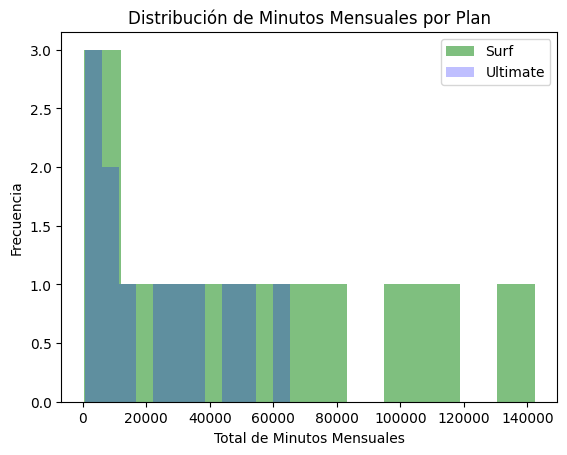

In [76]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
duration_user = df_merged.groupby(['plan', 'month'])['total_minutes'].sum().reset_index()
print(duration_user)

duration_user[duration_user['plan'] == 'surf']['total_minutes'].plot(kind='hist', bins=12, alpha=0.5, color='green')
duration_user[duration_user['plan'] == 'ultimate']['total_minutes'].plot(kind='hist', bins=12, alpha=0.25, color='blue')

plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Total de Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [136]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_surf = duration_user[duration_user['plan'] == 'surf']['total_minutes'].mean()
mean_ultimate = duration_user[duration_user['plan'] == 'ultimate']['total_minutes'].mean()   

var_surf = np.var(duration_user[duration_user['plan'] == 'surf']['total_minutes'])
var_ultimate = np.var(duration_user[duration_user['plan'] == 'ultimate']['total_minutes'])

print('Media de duracion mensual de llamadas plan Surf:\t', mean_surf)
print('Media de duracion mensual de llamadas plan Ultimate:\t', mean_ultimate)
print('Varianza de duracion mensual de llamadas plan Surf:\t', var_surf)
print('Varianza de duracion mensual de llamadas plan Ultimate:\t', var_ultimate)
print()
print(duration_user[duration_user['plan'] == 'surf']['total_minutes'].describe())
print()
print(duration_user[duration_user['plan'] == 'ultimate']['total_minutes'].describe())

Media de duracion mensual de llamadas plan Surf:	 53057.60333333333
Media de duracion mensual de llamadas plan Ultimate:	 24371.585000000003
Varianza de duracion mensual de llamadas plan Surf:	 1963633546.295989
Varianza de duracion mensual de llamadas plan Ultimate:	 426189018.833375

count        12.000000
mean      53057.603333
std       46283.319748
min         385.680000
25%       14252.327500
50%       45433.285000
75%       80926.617500
max      142297.140000
Name: total_minutes, dtype: float64

count       12.000000
mean     24371.585000
std      21562.316088
min        732.650000
25%       5842.107500
50%      20131.695000
75%      37923.985000
max      65384.900000
Name: total_minutes, dtype: float64


#### Diagrama de caja para llamadas del plan Sruf

<Axes: ylabel='total_minutes'>

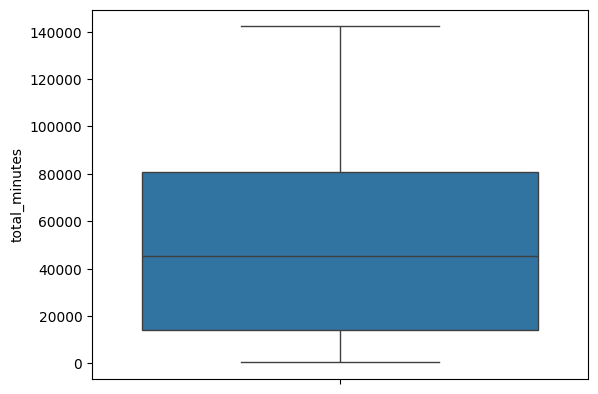

In [115]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas Surf
sns.boxplot(duration_user[duration_user['plan'] == 'surf']['total_minutes'])

#### Diagrama de caja para llamdas del plan Ultimate

<Axes: ylabel='total_minutes'>

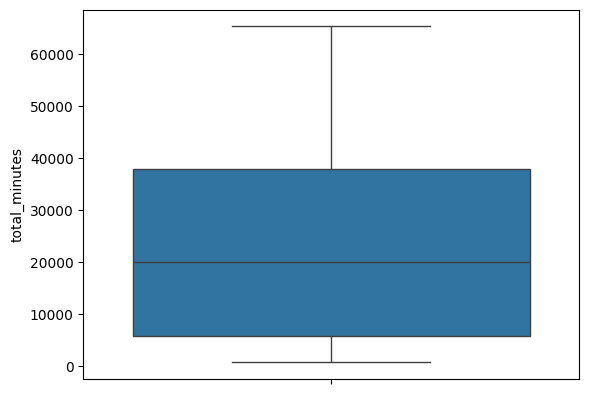

In [117]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas Ultimate
sns.boxplot(duration_user[duration_user['plan'] == 'ultimate']['total_minutes'])

Basándonos en el análisis de la duración de las llamadas, podemos destacar varias observaciones importantes. En primer lugar, la duración promedio de las llamadas para ambos planes es muy similar, lo cual inicialmente sugiere similitudes en el comportamiento de los usuarios de cada plan. Sin embargo, al profundizar en los datos mensuales, observamos que los usuarios del plan Surf acumularon más minutos a lo largo del año. Esta diferencia se hace aún más evidente al comparar la media y la varianza, donde el plan Surf muestra cifras que son aproximadamente el doble de altas que las del plan Ultimate.

Los diagramas de caja (boxplots) son herramientas visuales útiles para confirmar y reforzar conclusiones basadas en el análisis de datos, como en el caso del consumo de minutos entre los planes Surf y Ultimate. Veamos cómo estos diagramas pueden respaldar y ampliar las conclusiones mencionadas:

Plan Surf: El diagrama de caja muestra que los valores están distribuidos entre aproximadamente 300 y 150,000 minutos a lo largo de todo el conjunto de datos. El intervalo intercuartílico (IQR) se extiende desde aproximadamente 18,000 hasta 80,000 minutos. Esto indica que la mayoría de los datos están concentrados dentro de este rango, con una dispersión relativamente uniforme alrededor de la mediana.

Plan Ultimate: Por otro lado, el diagrama de caja del plan Ultimate muestra valores que van desde aproximadamente 700 hasta 65,000 minutos. El IQR de este plan está entre 6,000 y 38,000 minutos aproximadamente. Esto sugiere que, aunque hay una amplia gama de valores, la distribución de los datos es más concentrada en comparación con el plan Surf, con una distribución semiuniforme respecto a la mediana.



### Mensajes

Promedio de mensajes por mes para cada plan:
        plan  month  messages_count
0       surf      1            21.0
1       surf      2           108.0
2       surf      3           351.0
3       surf      4           870.0
4       surf      5          1849.0
5       surf      6          2454.0
6       surf      7          3271.0
7       surf      8          4662.0
8       surf      9          5968.0
9       surf     10          8020.0
10      surf     11          9165.0
11      surf     12         12275.0
12  ultimate      1            62.0
13  ultimate      2           151.0
14  ultimate      3           243.0
15  ultimate      4           463.0
16  ultimate      5           931.0
17  ultimate      6          1379.0
18  ultimate      7          1937.0
19  ultimate      8          2732.0
20  ultimate      9          3259.0
21  ultimate     10          4181.0
22  ultimate     11          4903.0
23  ultimate     12          6796.0


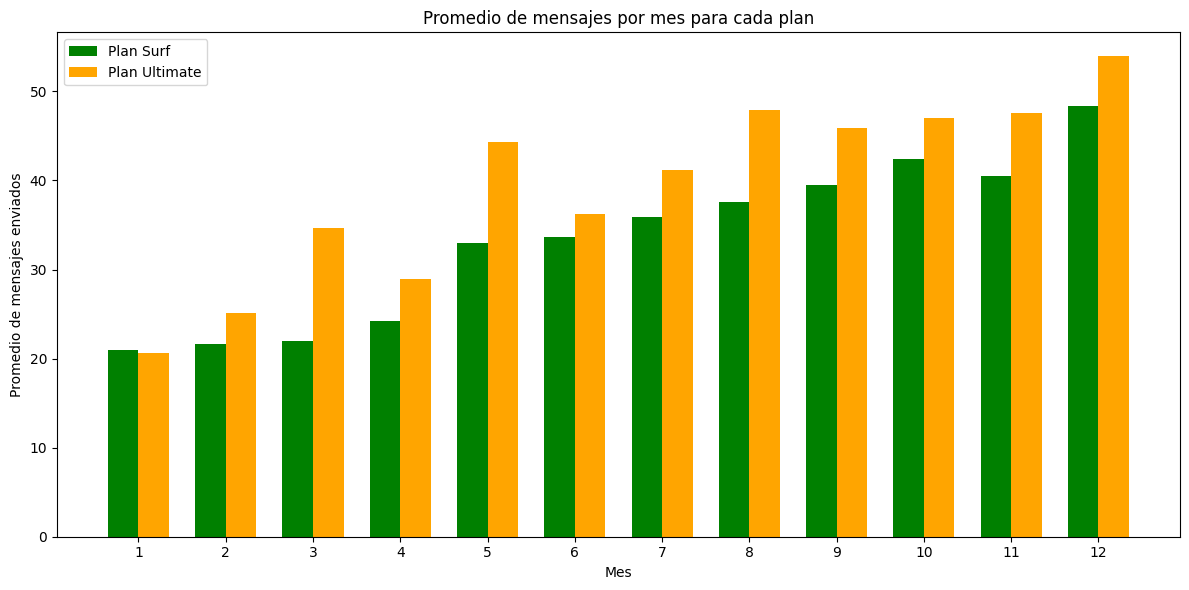

In [130]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
average_messages_per_plan = df_merged.groupby(['plan','month'])['messages_count'].mean().reset_index()
sum_messages_per_plan = df_merged.groupby(['plan','month'])['messages_count'].sum().reset_index()

# Mostrar los resultados
print("Promedio de mensajes por mes para cada plan:")
print(sum_messages_per_plan)

avg_messages_surf = average_messages_per_plan[average_messages_per_plan['plan'] == 'surf']
avg_messages_ultimate = average_messages_per_plan[average_messages_per_plan['plan'] == 'ultimate']

# Obtener los meses únicos para ajustar la posición de las barras
months = average_messages_per_plan['month'].unique()
num_months = len(months)

# Crear la figura y los ejes para los gráficos
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular el ancho de las barras
bar_width = 0.35

# Definir la posición de las barras para surf y ultimate
surf_positions = np.arange(num_months)
ultimate_positions = np.arange(num_months) + bar_width

# Graficar para el plan 'surf'
ax.bar(surf_positions, avg_messages_surf['messages_count'], width=bar_width, color='green', label='Plan Surf')

# Graficar para el plan 'ultimate'
ax.bar(ultimate_positions, avg_messages_ultimate['messages_count'], width=bar_width, color='orange', label='Plan Ultimate')

# Configuración adicional del gráfico
ax.set_title('Promedio de mensajes por mes para cada plan')
ax.set_xlabel('Mes')
ax.set_ylabel('Promedio de mensajes enviados')
ax.set_xticks(np.arange(num_months) + bar_width / 2)
ax.set_xticklabels(months)
ax.legend()

# Ajustar el espaciado entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()


In [135]:
# Calcula la media y la varianza del conteo de mensajes.
mean_surf = sum_messages_per_plan[sum_messages_per_plan['plan'] == 'surf']['messages_count'].mean()
mean_ultimate = sum_messages_per_plan[sum_messages_per_plan['plan'] == 'ultimate']['messages_count'].mean()

var_surf = np.var(sum_messages_per_plan[sum_messages_per_plan['plan'] == 'surf']['messages_count'])
var_ultimate = np.var(sum_messages_per_plan[sum_messages_per_plan['plan'] == 'ultimate']['messages_count'])

print('Media de mensajes para el plan Surf:\t\t', mean_surf)
print('Media de mensajes para el plan plan Ultimate:\t', mean_ultimate)
print('Varianza de mensajes para el plan plan Surf:\t', var_surf)
print('Varianza de mensajes para el plan plan Ultimate:', var_ultimate)
print()
print(sum_messages_per_plan[sum_messages_per_plan['plan'] == 'surf']['messages_count'].describe())
print()
print(sum_messages_per_plan[sum_messages_per_plan['plan'] == 'ultimate']['messages_count'].describe())

Media de mensajes para el plan Surf:		 4084.5
Media de mensajes para el plan plan Ultimate:	 2253.0833333333335
Varianza de mensajes para el plan plan Surf:	 14764949.916666666
Varianza de mensajes para el plan plan Ultimate: 4307875.909722221

count       12.000000
mean      4084.500000
std       4013.379884
min         21.000000
25%        740.250000
50%       2862.500000
75%       6481.000000
max      12275.000000
Name: messages_count, dtype: float64

count      12.000000
mean     2253.083333
std      2167.833248
min        62.000000
25%       408.000000
50%      1658.000000
75%      3489.500000
max      6796.000000
Name: messages_count, dtype: float64


#### Diagrama de caja para mensajes del plan Surf

<Axes: ylabel='messages_count'>

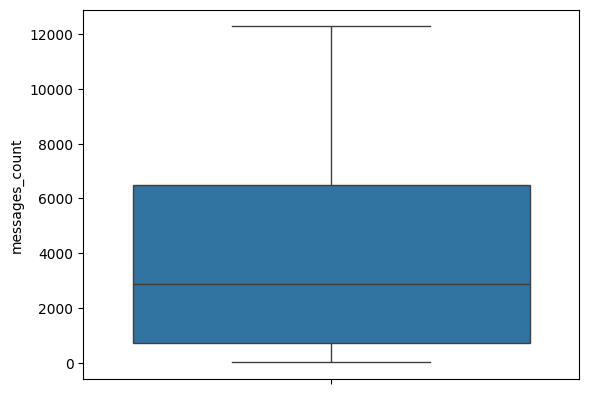

In [119]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas Surf
sns.boxplot(sum_messages_per_plan[sum_messages_per_plan['plan'] == 'surf']['messages_count'])

#### Diagrama de caja para los mensajes del plan Ultimate

<Axes: ylabel='messages_count'>

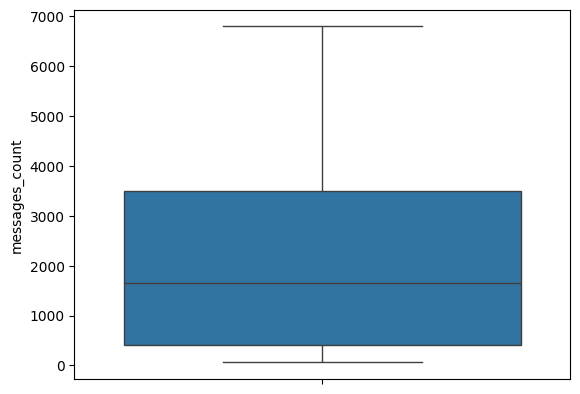

In [120]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas Surf
sns.boxplot(sum_messages_per_plan[sum_messages_per_plan['plan'] == 'ultimate']['messages_count'])

Basándonos en el análisis de los datos, podemos hacer varias observaciones significativas. Al observar la gráfica del promedio de mensajes enviados mes a mes, parece que el plan Ultimate supera al plan Surf. Sin embargo, al examinar el promedio y la varianza general para cada plan, encontramos que sucede lo contrario a lo que sugiere la gráfica inicial. Similar al análisis de las llamadas, el plan Surf supera al plan Ultimate en términos de promedio y varianza.

Esto sugiere que, a pesar de que la gráfica mensual pueda mostrar un mayor número de mensajes enviados por usuario para el plan Ultimate en algunos meses, el promedio general y la variabilidad en el tiempo indican que los usuarios del plan Surf, en conjunto, envían más mensajes en total. Esto podría deberse a que el plan Surf podría tener más usuarios activos en general, lo que resulta en un mayor volumen total de mensajes enviados, a pesar de que el promedio por usuario puede ser menor que en el plan Ultimate.

Basado en los diagramas de caja, se puede observar que el plan Surf muestra un rango amplio de valores de mensajes enviados, que varía aproximadamente entre 20 y 12,500 mensajes. La concentración de valores se encuentra mayormente entre 700 y 6,000 mensajes, indicando una distribución sesgada hacia la derecha de la mediana. Esto sugiere que muchos usuarios del plan Surf envían una cantidad moderada a alta de mensajes, contribuyendo a un volumen total considerable de mensajes enviados. En contraste, el plan Ultimate exhibe un rango más estrecho de valores, entre 60 y 7,000 mensajes, con una concentración de valores principalmente entre 400 y 3,500 mensajes. La distribución está sesgada hacia la izquierda de la mediana, indicando que menos usuarios del plan Ultimate envían grandes cantidades de mensajes. Aunque ambos planes muestran un volumen considerable de mensajes, el plan Surf destaca por tener una distribución más amplia y una mayor concentración de usuarios que envían mensajes en cantidades moderadas a altas.

### Trafico de internet

Total de tráfico de Internet consumido por mes para cada plan (en MB):
        plan  month  total_mb_used
0       surf      1        9749.72
1       surf      2      109609.59
2       surf      3      306945.12
3       surf      4      599210.15
4       surf      5     1073099.33
5       surf      6     1484248.33
6       surf      7     2030815.67
7       surf      8     2720843.68
8       surf      9     3218737.67
9       surf     10     4102786.41
10      surf     11     4624009.00
11      surf     12     5766125.26
12  ultimate      1       27672.37
13  ultimate      2      119901.66
14  ultimate      3      219858.22
15  ultimate      4      338554.75
16  ultimate      5      482109.99
17  ultimate      6      720882.29
18  ultimate      7      964339.92
19  ultimate      8     1264845.13
20  ultimate      9     1459408.78
21  ultimate     10     1866930.66
22  ultimate     11     2163278.04
23  ultimate     12     2766801.97


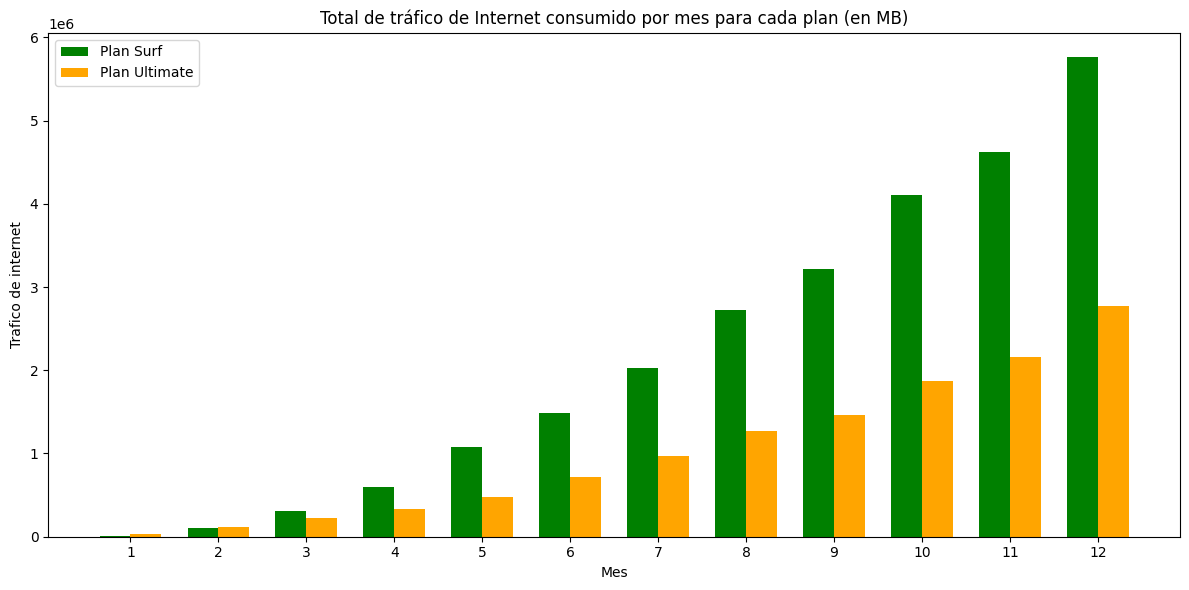

In [80]:
# Calcular la suma total de tráfico de Internet consumido por mes para cada plan
total_mb_per_plan = df_merged.groupby(['plan', 'month'])['total_mb_used'].sum().reset_index()

# Mostrar los resultados
print("Total de tráfico de Internet consumido por mes para cada plan (en MB):")
print(total_mb_per_plan)

sum_mb_surf = total_mb_per_plan[total_mb_per_plan['plan'] == 'surf']
sum_mb_ultimate = total_mb_per_plan[total_mb_per_plan['plan'] == 'ultimate']

# Obtener los meses únicos para ajustar la posición de las barras
months = total_mb_per_plan['month'].unique()
num_months = len(months)

# Crear la figura y los ejes para los gráficos
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular el ancho de las barras
bar_width = 0.35

# Definir la posición de las barras para surf y ultimate
surf_positions = np.arange(num_months)
ultimate_positions = np.arange(num_months) + bar_width

# Graficar para el plan 'surf'
ax.bar(surf_positions, sum_mb_surf['total_mb_used'], width=bar_width, color='green', label='Plan Surf')

# Graficar para el plan 'ultimate'
ax.bar(ultimate_positions, sum_mb_ultimate['total_mb_used'], width=bar_width, color='orange', label='Plan Ultimate')

# Configuración adicional del gráfico
ax.set_title('Total de tráfico de Internet consumido por mes para cada plan (en MB)')
ax.set_xlabel('Mes')
ax.set_ylabel('Trafico de internet')
ax.set_xticks(np.arange(num_months) + bar_width / 2)
ax.set_xticklabels(months)
ax.legend()

# Ajustar el espaciado entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()


In [146]:
mean_surf = total_mb_per_plan[total_mb_per_plan['plan'] == 'surf']['total_mb_used'].mean()
mean_ultimate = total_mb_per_plan[total_mb_per_plan['plan'] == 'ultimate']['total_mb_used'].mean()

var_surf = np.var(total_mb_per_plan[total_mb_per_plan['plan'] == 'surf']['total_mb_used'])
var_ultimate = np.var(total_mb_per_plan[total_mb_per_plan['plan'] == 'ultimate']['total_mb_used'])

print('Media de trafico de internet para el plan Surf:\t\t\t', mean_surf)
print('Media de trafico de internet para el plan plan Ultimate:\t', mean_ultimate)
print('Varianza de trafico de internet para el plan plan Surf:\t\t', var_surf)
print('Varianza de trafico de internet para el plan plan Ultimate:\t', var_ultimate)
print()
print(total_mb_per_plan[total_mb_per_plan['plan'] == 'surf']['total_mb_used'].describe())
print()
print(total_mb_per_plan[total_mb_per_plan['plan'] == 'ultimate']['total_mb_used'].describe())

Media de trafico de internet para el plan Surf:			 2170514.9941666666
Media de trafico de internet para el plan plan Ultimate:	 1032881.9816666668
Varianza de trafico de internet para el plan plan Surf:		 3386356625425.291
Varianza de trafico de internet para el plan plan Ultimate:	 717342663814.6993

count    1.200000e+01
mean     2.170515e+06
std      1.922032e+06
min      9.749720e+03
25%      5.261439e+05
50%      1.757532e+06
75%      3.439750e+06
max      5.766125e+06
Name: total_mb_used, dtype: float64

count    1.200000e+01
mean     1.032882e+06
std      8.846217e+05
min      2.767237e+04
25%      3.088806e+05
50%      8.426111e+05
75%      1.561289e+06
max      2.766802e+06
Name: total_mb_used, dtype: float64


#### Diagrama de caja para internet del plan Surf

<Axes: ylabel='total_mb_used'>

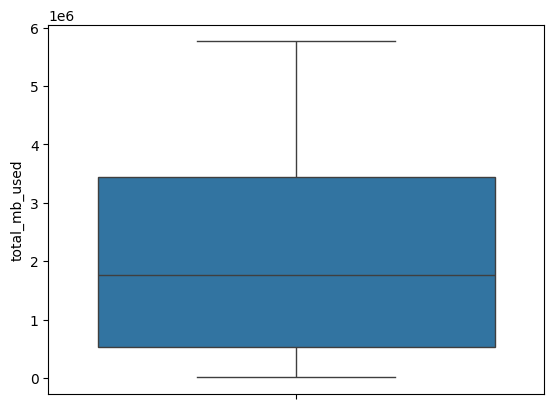

In [147]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas Surf
sns.boxplot(total_mb_per_plan[total_mb_per_plan['plan'] == 'surf']['total_mb_used'])

#### Diagrama de caja de internet para el plan Ultimate

<Axes: ylabel='total_mb_used'>

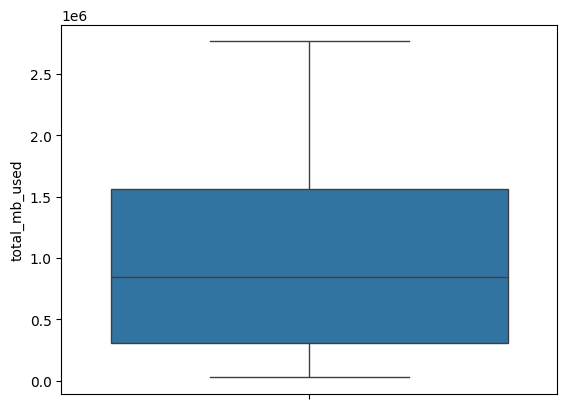

In [148]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas Ultimate
sns.boxplot(total_mb_per_plan[total_mb_per_plan['plan'] == 'ultimate']['total_mb_used'])

Basándonos en los datos del tráfico de internet, se puede observar claramente que el plan Surf supera al plan Ultimate en el consumo de datos en cada mes, doblando su uso en cada caso. Los diagramas de caja proporcionan una representación visual que confirma esta disparidad de manera más evidente: el plan Surf muestra un rango de valores de consumo de datos de 10,000 a 6,000,000, mientras que el plan Ultimate tiene un rango más limitado de 27,500 a solo 2,800,000. Esto indica de manera directa que el plan Surf tiene un volumen considerablemente mayor de tráfico de información en comparación con el plan Ultimate, sin necesidad de un análisis más exhaustivo para determinar cuál plan tiene una mayor demanda de datos.

### Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

Ingresos por mes para cada plan
        plan  month  monthly_income
0       surf      1           40.00
1       surf      2          308.34
2       surf      3         1053.23
3       surf      4         2022.93
4       surf      5         3637.49
5       surf      6         4746.71
6       surf      7         7529.38
7       surf      8        10299.43
8       surf      9        11242.75
9       surf     10        15417.11
10      surf     11        16310.27
11      surf     12        22294.40
12  ultimate      1          280.00
13  ultimate      2          490.00
14  ultimate      3          896.00
15  ultimate      4         1533.00
16  ultimate      5         2051.00
17  ultimate      6         3367.00
18  ultimate      7         4242.00
19  ultimate      8         5173.00
20  ultimate      9         6195.00
21  ultimate     10         7665.00
22  ultimate     11         9107.00
23  ultimate     12        11067.00


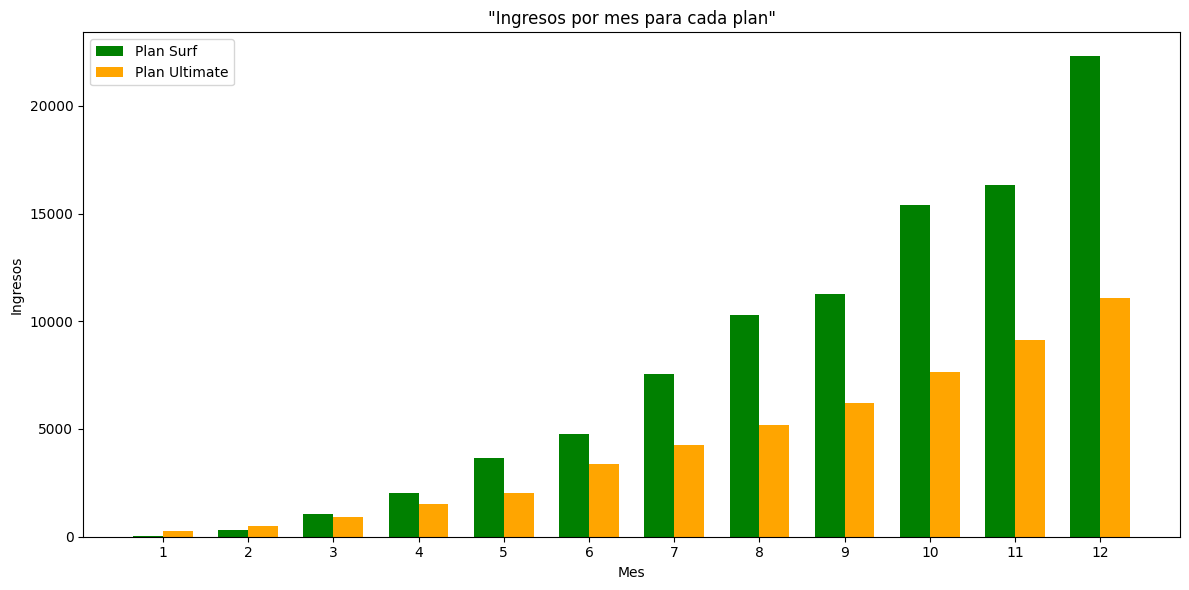

In [81]:
income_per_plan = df_merged.groupby(['plan', 'month'])['monthly_income'].sum().reset_index()

# Mostrar los resultados
print("Ingresos por mes para cada plan")
print(income_per_plan)

income_surf = income_per_plan[income_per_plan['plan'] == 'surf']
imcome_ultimate = income_per_plan[income_per_plan['plan'] == 'ultimate']

# Obtener los meses únicos para ajustar la posición de las barras
months = income_per_plan['month'].unique()
num_months = len(months)

# Crear la figura y los ejes para los gráficos
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular el ancho de las barras
bar_width = 0.35

# Definir la posición de las barras para surf y ultimate
surf_positions = np.arange(num_months)
ultimate_positions = np.arange(num_months) + bar_width

# Graficar para el plan 'surf'
ax.bar(surf_positions, income_surf['monthly_income'], width=bar_width, color='green', label='Plan Surf')

# Graficar para el plan 'ultimate'
ax.bar(ultimate_positions, imcome_ultimate['monthly_income'], width=bar_width, color='orange', label='Plan Ultimate')

# Configuración adicional del gráfico
ax.set_title('"Ingresos por mes para cada plan"')
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos')
ax.set_xticks(np.arange(num_months) + bar_width / 2)
ax.set_xticklabels(months)
ax.legend()

# Ajustar el espaciado entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()


In [149]:
mean_surf = income_per_plan[income_per_plan['plan'] == 'surf']['monthly_income'].mean()
mean_ultimate = income_per_plan[income_per_plan['plan'] == 'ultimate']['monthly_income'].mean()

var_surf = np.var(income_per_plan[income_per_plan['plan'] == 'surf']['monthly_income'])
var_ultimate = np.var(income_per_plan[income_per_plan['plan'] == 'ultimate']['monthly_income'])

print('Media de trafico de internet para el plan Surf:\t\t\t', mean_surf)
print('Media de trafico de internet para el plan plan Ultimate:\t', mean_ultimate)
print('Varianza de trafico de internet para el plan plan Surf:\t\t', var_surf)
print('Varianza de trafico de internet para el plan plan Ultimate:\t', var_ultimate)
print()
print(income_per_plan[income_per_plan['plan'] == 'surf']['monthly_income'].describe())
print()
print(income_per_plan[income_per_plan['plan'] == 'ultimate']['monthly_income'].describe())

Media de trafico de internet para el plan Surf:			 7908.503333333334
Media de trafico de internet para el plan plan Ultimate:	 4338.833333333333
Varianza de trafico de internet para el plan plan Surf:		 48370784.25618889
Varianza de trafico de internet para el plan plan Ultimate:	 11700806.63888889

count       12.000000
mean      7908.503333
std       7264.167418
min         40.000000
25%       1780.505000
50%       6138.045000
75%      12286.340000
max      22294.400000
Name: monthly_income, dtype: float64

count       12.000000
mean      4338.833333
std       3572.746329
min        280.000000
25%       1373.750000
50%       3804.500000
75%       6562.500000
max      11067.000000
Name: monthly_income, dtype: float64


#### Diagrama de caja para ingresos del plan Surf

<Axes: ylabel='monthly_income'>

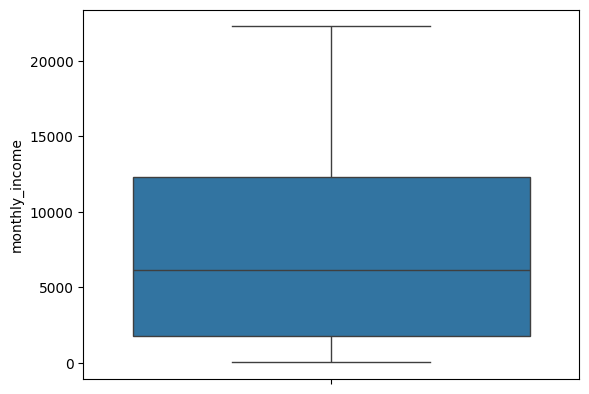

In [150]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas Surf
sns.boxplot(income_per_plan[income_per_plan['plan'] == 'surf']['monthly_income'])

#### Diagrama de caja para ingresos del plan Utimate

<Axes: ylabel='monthly_income'>

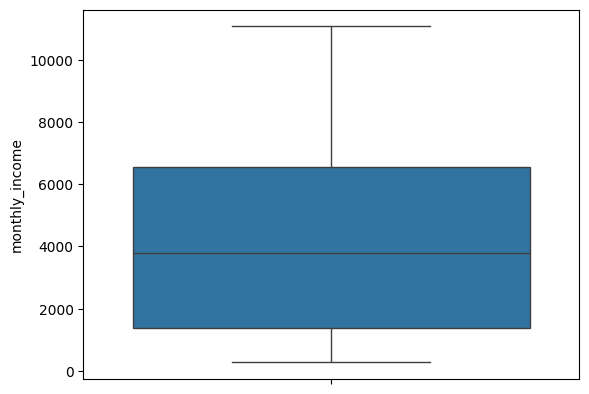

In [151]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas Ultimate
sns.boxplot(income_per_plan[income_per_plan['plan'] == 'ultimate']['monthly_income'])

Basándonos en los datos de ingresos por plan, se puede concluir claramente que el plan Surf contribuye más significativamente a las ganancias de la compañía. La observación de la gráfica muestra que el plan Ultimate lidera en ingresos solo durante los primeros dos meses del año, mientras que el plan Surf duplica este valor durante el resto del año. Esta disparidad también se refleja en los diagramas de caja, donde el plan Surf exhibe un rango de valores más amplio y un intervalo intercuartílico más extenso en comparación con el plan Ultimate. Estos hallazgos indican de manera inequívoca que la mayor parte de los ingresos provienen del plan Surf, haciendo innecesario un análisis más profundo para comprender la diferencia significativa en contribuciones financieras entre ambos planes.

## Prueba las hipótesis estadísticas

Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

In [82]:
# Prueba las hipótesis
# Separar los ingresos por plan
income_surf = df_merged[df_merged['plan'] == 'surf']['monthly_income']
income_ultimate = df_merged[df_merged['plan'] == 'ultimate']['monthly_income']

# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = st.ttest_ind(income_surf, income_ultimate, equal_var=False)

# Mostrar los resultados
print(f"Valor de t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio son diferentes.")


Valor de t: -8.225558153987386
Valor p: 3.626607306410092e-16
Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio son diferentes.


Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [96]:
# Prueba las hipótesis
# Separar los ingresos por la region de NY-NJ y las demas
income_NY_NJ = df_merged[df_merged['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_income']
income_others = df_merged[df_merged['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_income']

# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = st.ttest_ind(income_NY_NJ, income_others, equal_var=False)

# Mostrar los resultados
print(f"Valor de t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio son diferentes.")

Valor de t: -2.159412770548063
Valor p: 0.031239256515302714
Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio son diferentes.


## Conclusión general

En conclusión, el análisis detallado de los planes Surf y Ultimate revela patrones distintivos en el comportamiento de los usuarios y en el rendimiento financiero de la compañía. En términos de uso de servicios como llamadas, mensajes y tráfico de internet, el plan Surf muestra consistentemente un mayor volumen de actividad, reflejado en mayores promedios y variabilidades en comparación con el plan Ultimate. Este patrón se refuerza mediante diagramas de caja que destacan la distribución más amplia de datos para el plan Surf. Además, en cuanto a ingresos generados, el plan Surf contribuye de manera significativa durante todo el año, superando considerablemente al plan Ultimate en términos de ingresos acumulados mensualmente. Estas observaciones subrayan la importancia de comprender las preferencias y patrones de uso de los usuarios para ajustar estrategias comerciales y optimizar la oferta de servicios, asegurando así un mejor rendimiento financiero y satisfacción del cliente en la compañía.